In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(R"./../data/HousingData.xlsx")

target = "PRICE"
features = df.columns.drop(target).to_list()


print("Target: ", target)
print("Features: ", features)
print("\nDataFrame:")
df.head()


Target:  PRICE
Features:  ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']

DataFrame:


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24000
1,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311,15.2,12.43,22900
2,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,311,15.2,19.15,27100
3,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,311,15.2,29.93,16500
4,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,311,15.2,17.10,18900


In [3]:
def plot_boxplot(df, features, max, interval):
    plt.figure(figsize=(24, 7))
    sns.boxplot(data=df[features], orient="h")
    plt.xticks(ticks=range(0, max+interval+1, interval))
    plt.show()

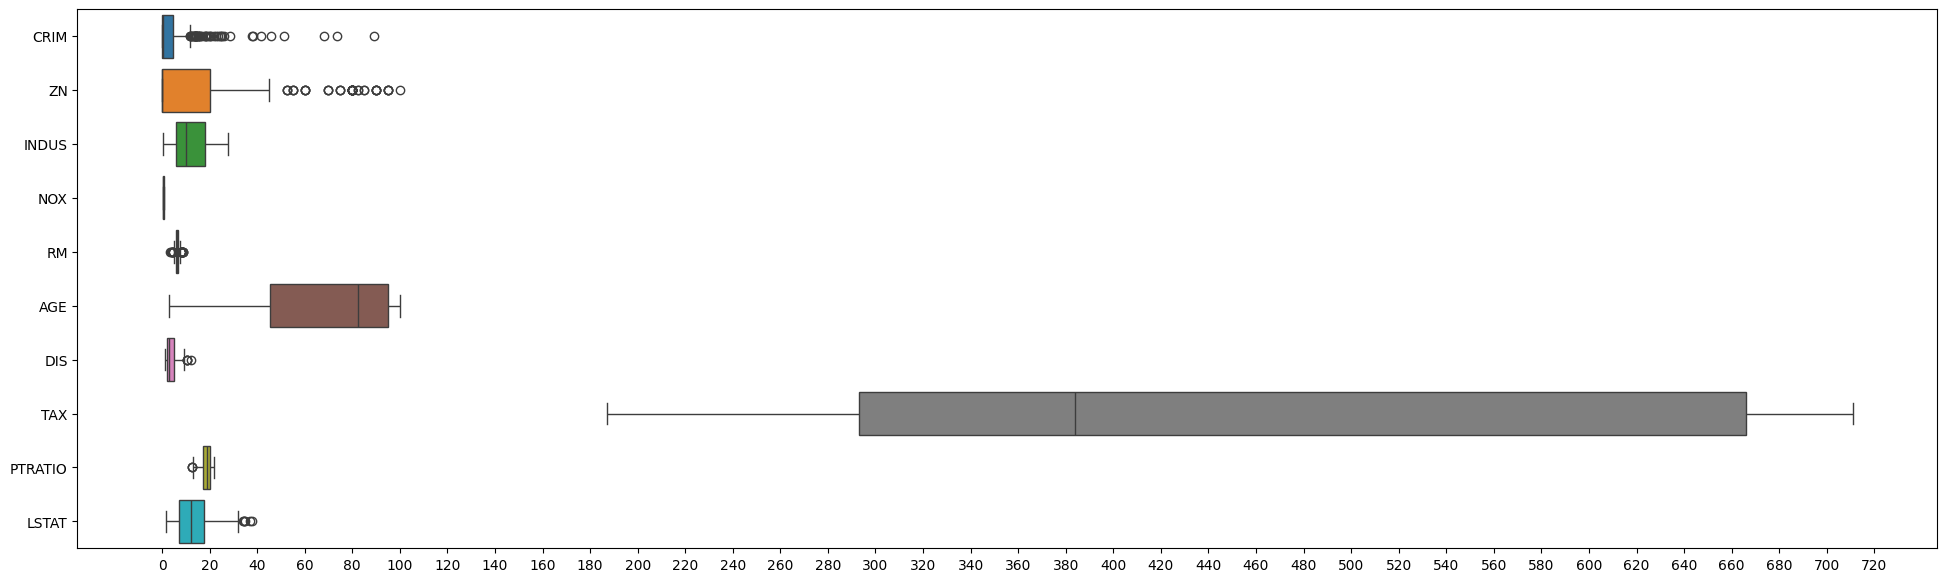

In [4]:
plot_boxplot(df, features, 700, 20)


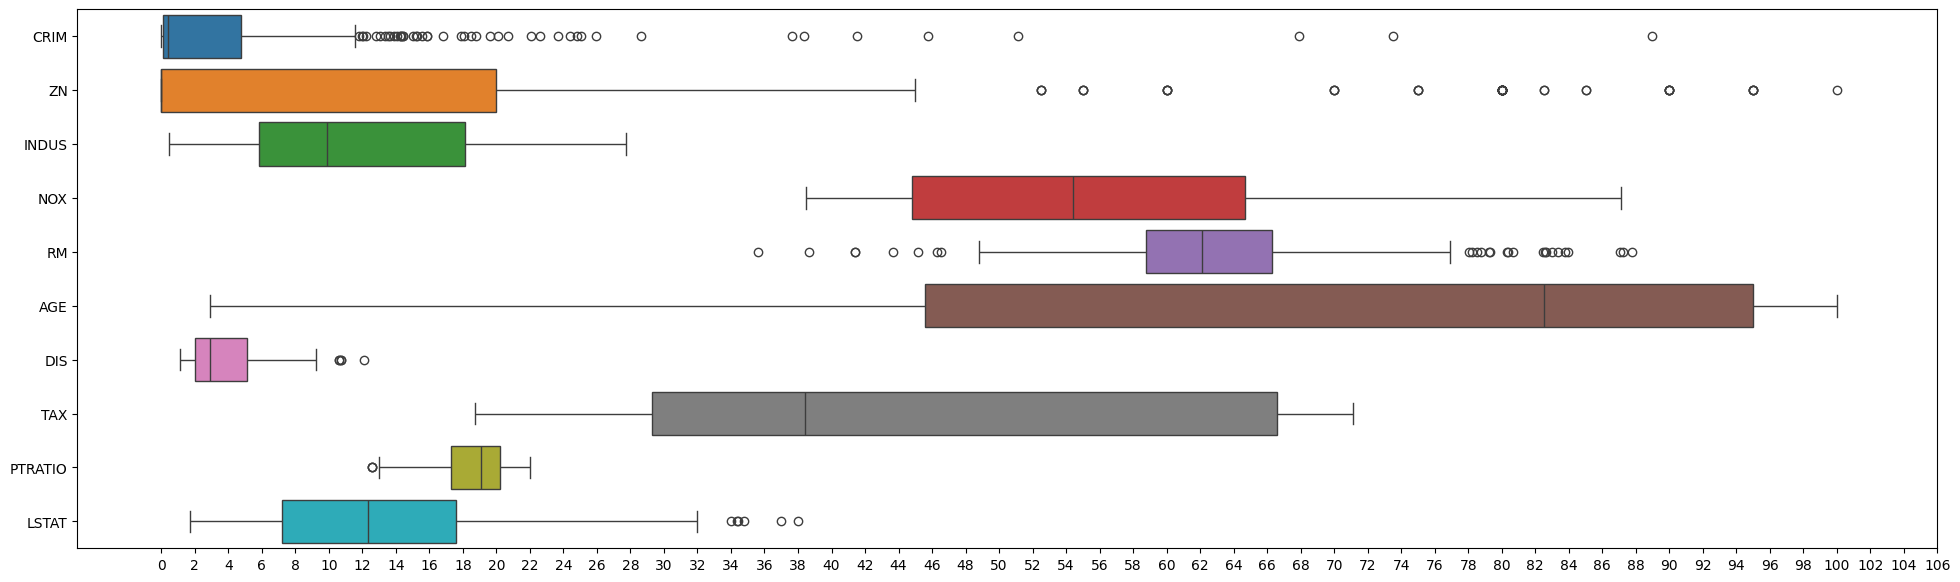

In [5]:
df_scaled = df[features].copy()

df_scaled["NOX"] = df["NOX"]*100
df_scaled["RM"] = df["RM"]*10
df_scaled["TAX"] = df["TAX"]/10

plot_boxplot(df_scaled, features, 104, 2)

In [6]:
def plot_all_histogram(dataFrame, features):
    skewed = []

    plt.figure(figsize=(10, 18))
    for i, col in enumerate(features):
        plt.subplot(5, 2, i + 1)
        sns.histplot(dataFrame[col], kde=True)
        plt.title(f"Distribution of {col}\nSkewness: {abs(round(dataFrame[col].skew(),3))}")
    
        if (abs(dataFrame[col].skew()) > 1):
            skewed.append(col)

    plt.tight_layout()
    plt.show()

    print(f"Skewed features: {skewed}")
    return skewed

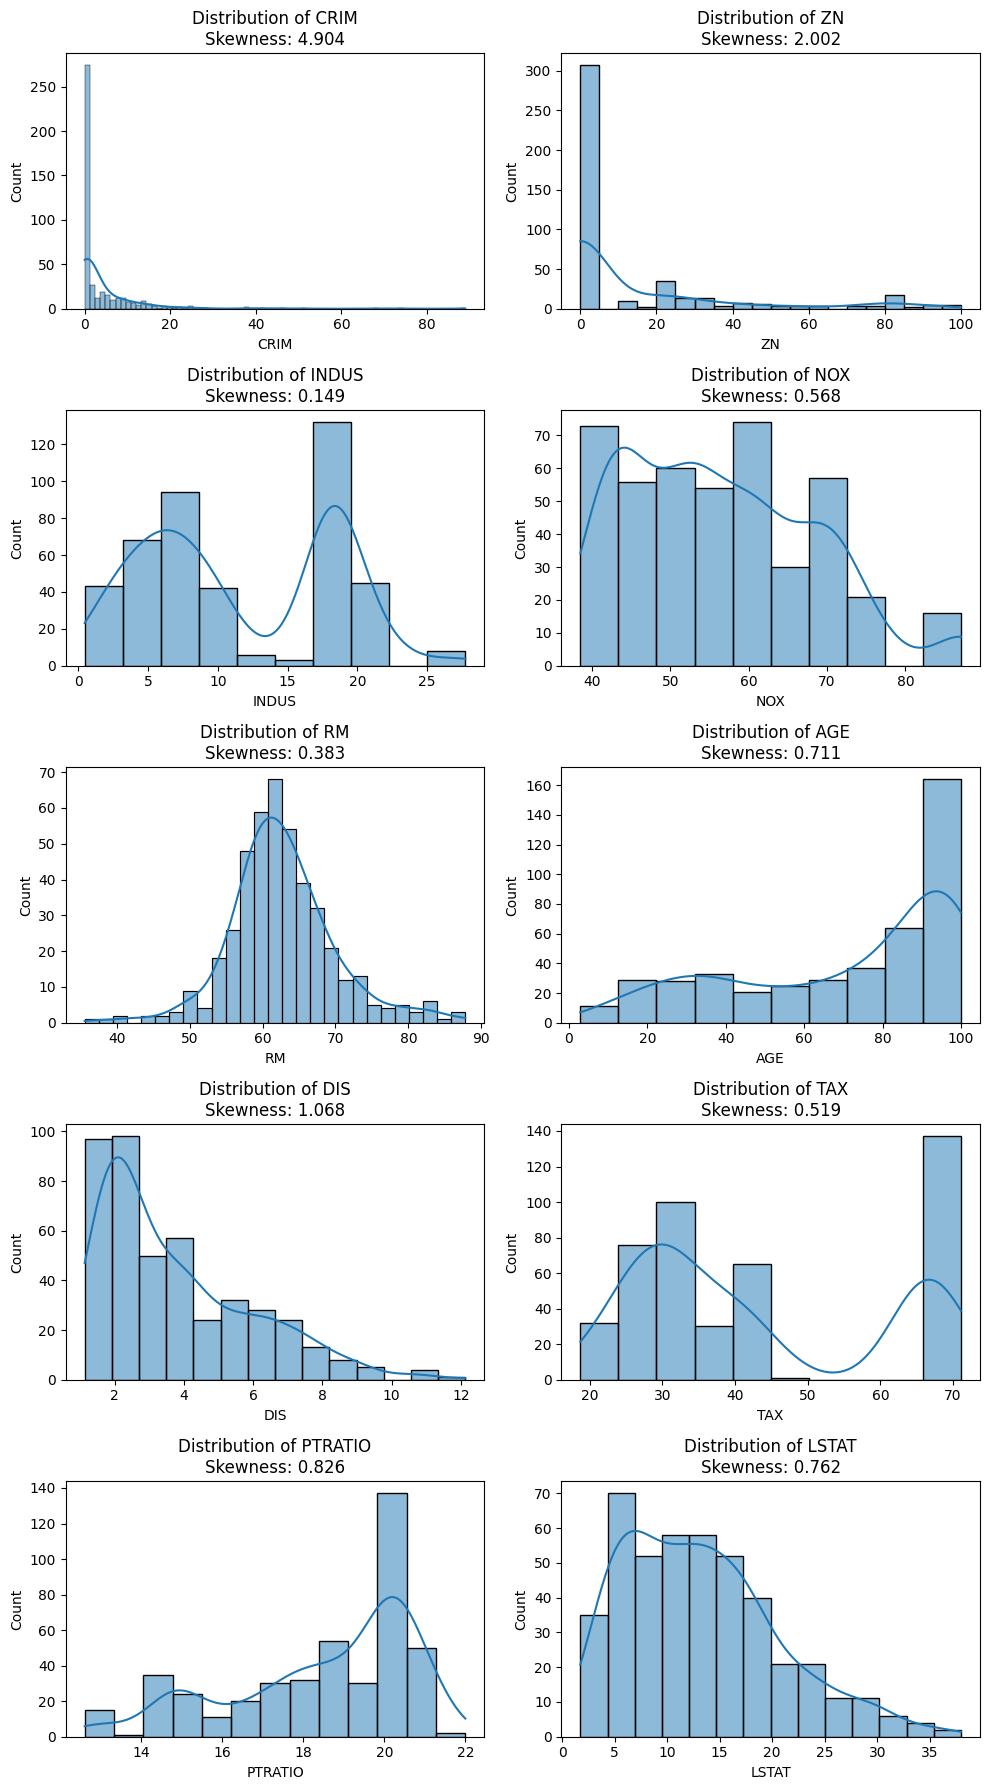

Skewed features: ['CRIM', 'ZN', 'DIS']


In [7]:
skewd = plot_all_histogram(df_scaled, features)

In [8]:
df_norm = df_scaled.copy()
temp = skewd.copy()
temp.remove("ZN")

for col in temp:
    df_norm.loc[:, col] = np.log(df_scaled[col])



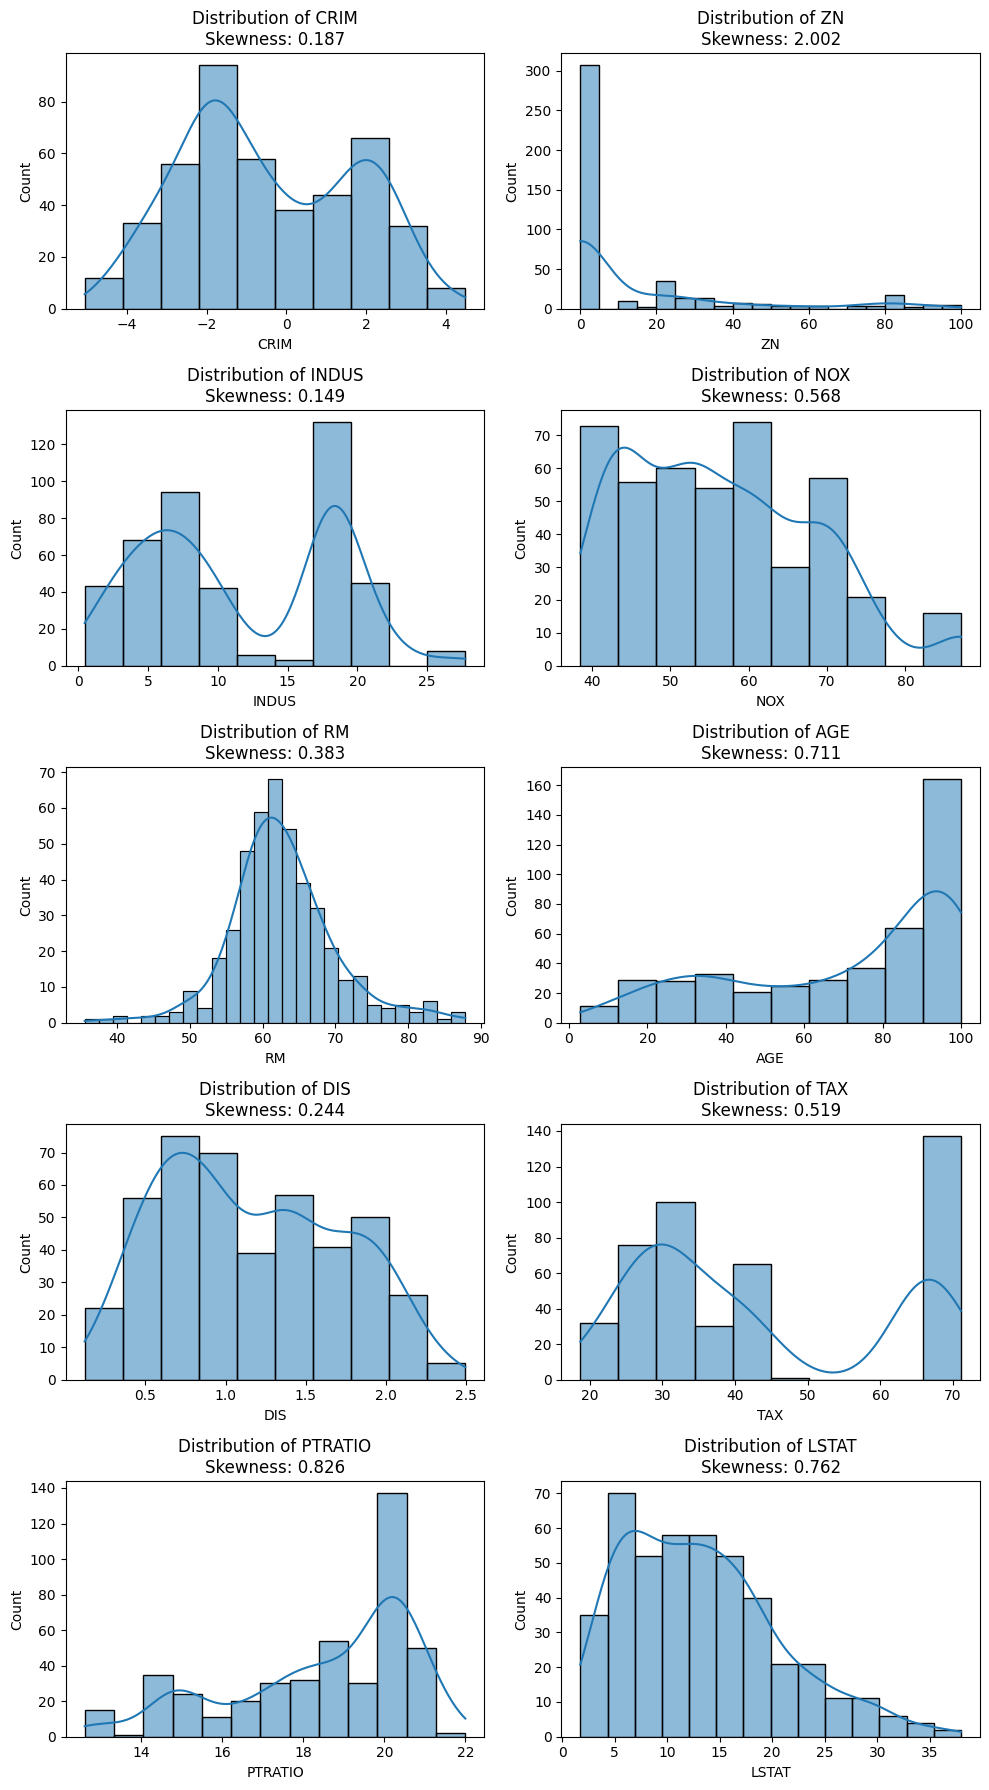

Skewed features: ['ZN']


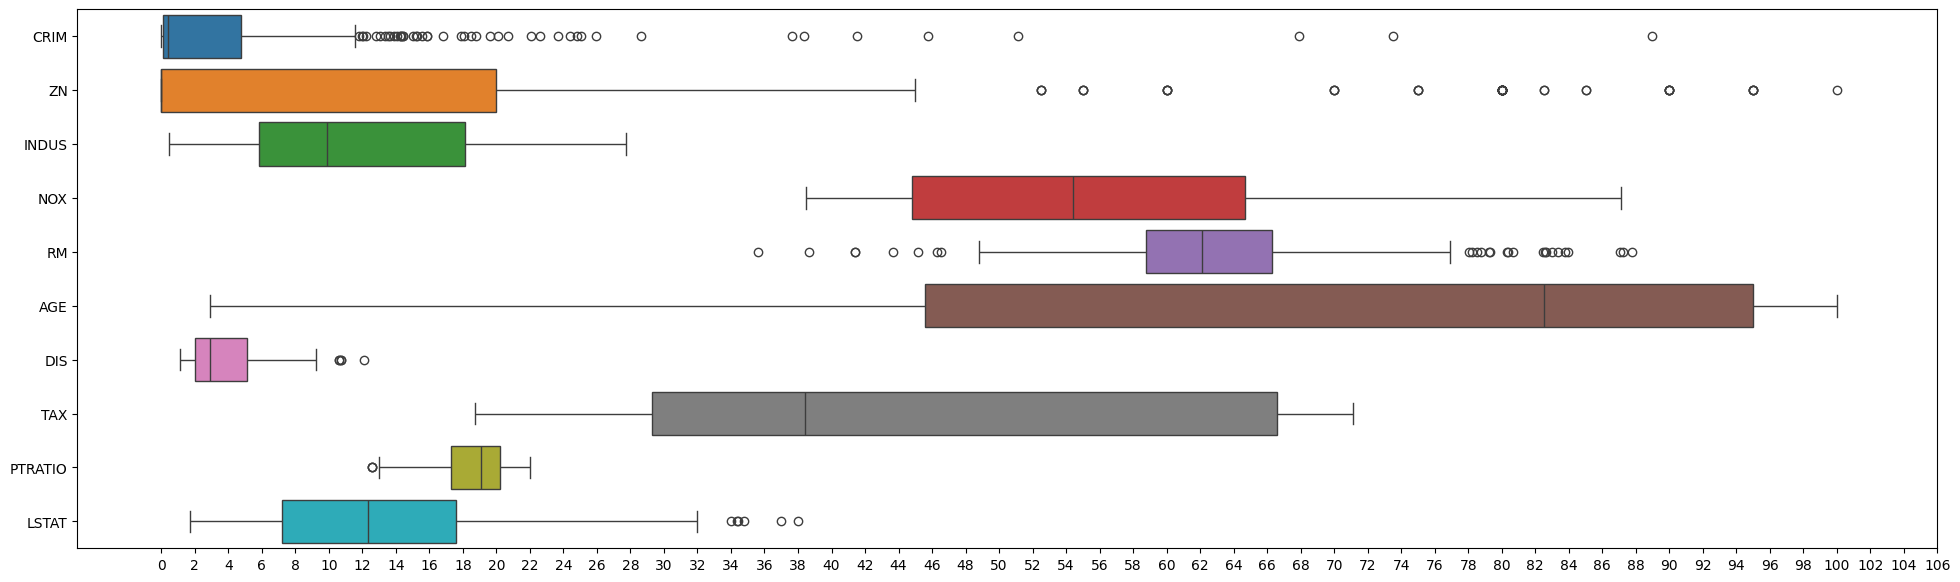

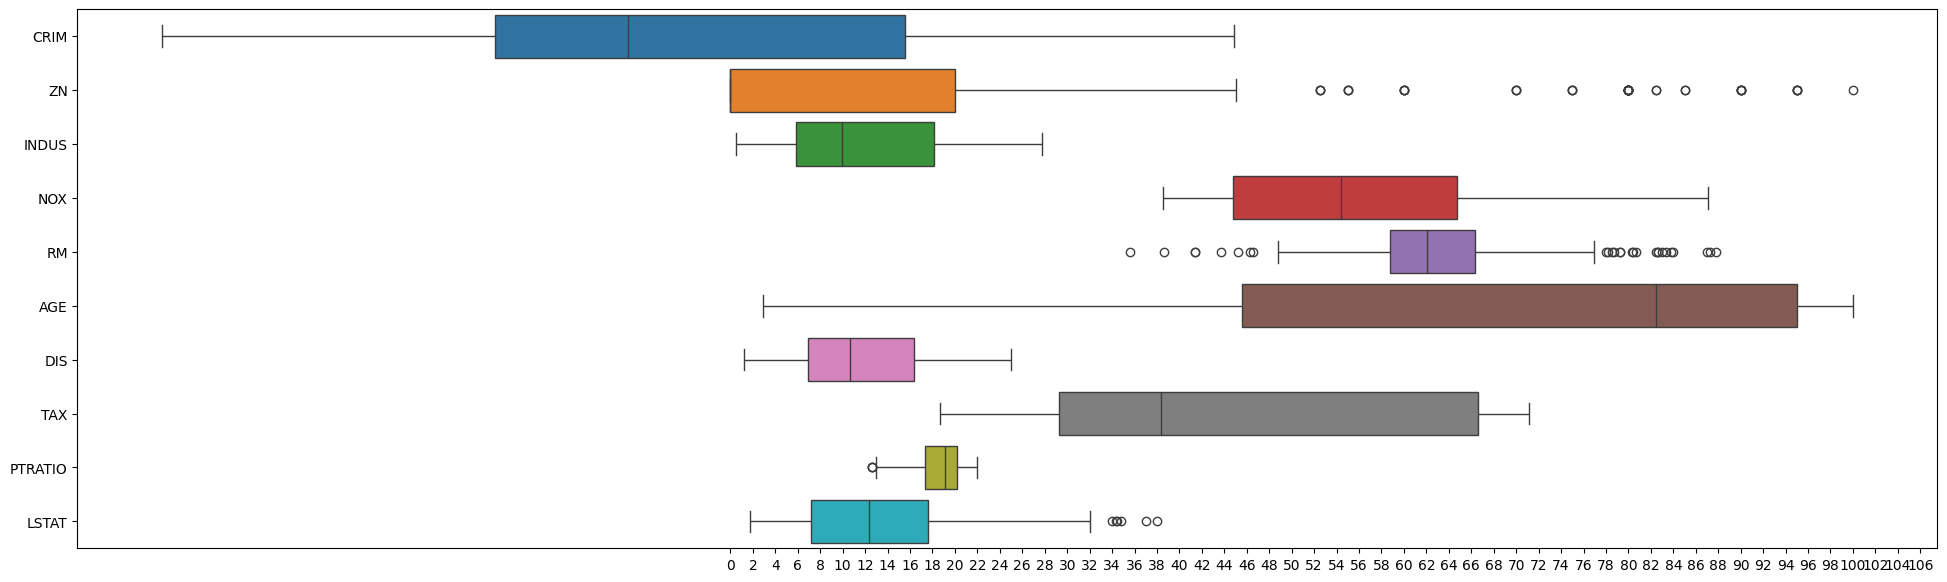

In [9]:
skewd = plot_all_histogram(df_norm, features)
plot_boxplot(df_scaled, features, 104, 2)

df_normScaled = df_norm.copy()
df_normScaled["DIS"] = df_norm["DIS"]*10
df_normScaled["CRIM"] = df_norm["CRIM"]*10

plot_boxplot(df_normScaled, features, 104, 2)

In [10]:
# Get the matching PRICE values from the original df using the same index
df_target_clean = pd.DataFrame(df.loc[df_norm.index, "PRICE"], columns=["PRICE"])

df_cleand = df_norm.join(df_target_clean)
df_cleand.to_csv(R"./../output/HousingData_cleaned.xlsx", index=False)

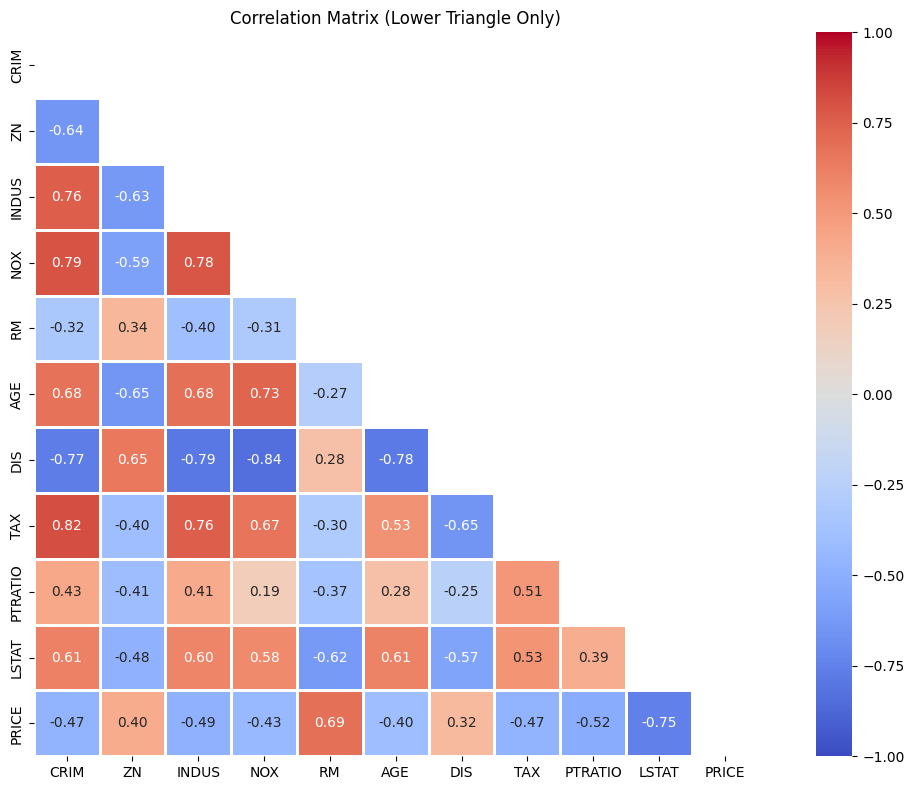

In [11]:
df_corr = df_cleand.copy()
corr_matrix = df_corr.corr()

# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,                # hide top triangle
    cmap='coolwarm',          # color palette
    vmin=-1, vmax=1,          # full correlation range
    center=0,                 # center the scale at 0
    annot=True,               # show numbers
    fmt=".2f",                # round to 2 decimal places
    square=True,              # square cells
    linewidths=0.8,           # border between cells
)

plt.title("Correlation Matrix (Lower Triangle Only)")
plt.tight_layout()
plt.show()


In [12]:
x = df_cleand[features]
y = df_cleand[target]
df_cleand.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
0,-5.064036,18.0,2.31,53.8,65.75,65.2,1.408545,29.6,15.3,4.98,24000
1,-2.427128,12.5,7.87,52.4,60.12,66.6,1.715688,31.1,15.2,12.43,22900
2,-1.934130,12.5,7.87,52.4,61.72,96.1,1.783475,31.1,15.2,19.15,27100
3,-1.554760,12.5,7.87,52.4,56.31,100.0,1.805350,31.1,15.2,29.93,16500
4,-1.771722,12.5,7.87,52.4,60.04,85.9,1.885872,31.1,15.2,17.10,18900


In [13]:
# Import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
x_poly.shape

(441, 65)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=90)
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")


Train shape: (352, 65), Test shape: (89, 65)


In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_train_pred = model.predict(x_train)
y_test_pred  = model.predict(x_test)

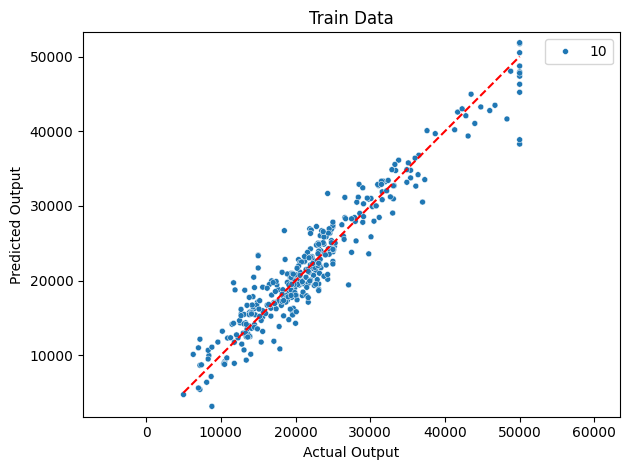

In [18]:
sns.scatterplot(x=y_train, y=y_train_pred, size=10)
sns.lineplot(x=y_train, y=y_train, color='red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Train Data')
plt.tight_layout()
plt.show()

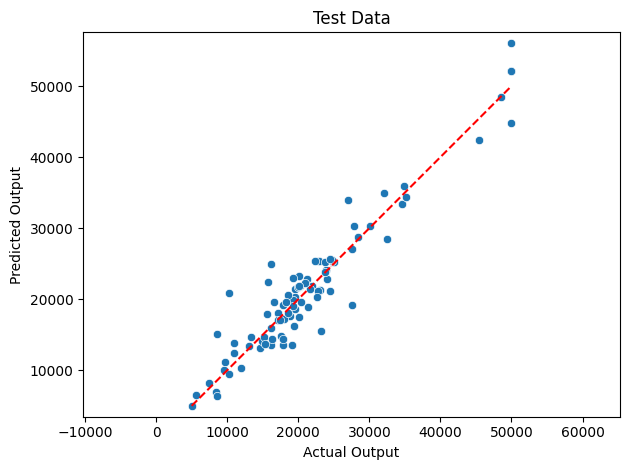

In [19]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Test Data')
plt.tight_layout()
plt.show()

In [20]:
train_mse =  np.round(mean_squared_error(y_train, y_train_pred),3)
train_rmse =  np.round(np.sqrt(train_mse),4)

print('TRAINING DATA:')
print(f'Polynomial Regression RMSE : {train_rmse}')

TRAINING DATA:
Polynomial Regression RMSE : 2670.874


In [21]:
test_mse =  np.round(mean_squared_error(y_test, y_test_pred),3)
test_rmse =  np.round(np.sqrt(test_mse),4)

print('TESTING DATA:')
print(f'PolynomialRegression RMSE : {test_rmse}')

TESTING DATA:
PolynomialRegression RMSE : 3029.9113


- df["NOX"] = df["NOX"]*100
- df["RM"] = df["RM"]*10
- df["TAX"] = df["TAX"]/10
- df.loc[:, "CRIM"] = np.log(df["CRIM"])
- df.loc[:, "DIS"] = np.log(df["DIS"])
- df["CRIM"] = df["CRIM"]*10
- df["DIS"] = df["DIS"]*10


In [22]:
x_point = {
    "CRIM": 4.1,
    "ZN": 13.5,
    "INDUS": 11.8,
    "NOX": 0.55, 
    "RM": 5,
    "AGE": 68, 
    "DIS": 3.5, 
    "TAX": 385, 
    "PTRATIO": 15.7, 
    "LSTAT": 13.4
}


In [23]:
x_point["NOX"] = x_point["NOX"]*100
x_point["RM"] = x_point["RM"]*10
x_point["TAX"] = x_point["TAX"]/10
x_point["CRIM"] = np.log(x_point["CRIM"])
x_point["DIS"] = np.log(x_point["DIS"])
x_point["CRIM"] = x_point["CRIM"]*10
x_point["DIS"] = x_point["DIS"]*10

df_x_plot = pd.DataFrame([x_point], columns=features)
df_x_plot.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,14.10987,13.5,11.8,55.0,50,68,12.52763,38.5,15.7,13.4


In [24]:
x_point_poly = poly.transform(df_x_plot)
y_pred = model.predict(x_point_poly)

print(f'House Price  : ${np.round(y_pred[0], 2):,} ± ${train_rmse}')

House Price  : $1,837,853.0 ± $2670.874
